Business Case Study: Forecasting Airline Passengers for Strategic Planning
Objective:
To analyze and forecast the number of international airline passengers using the
AirPassenger dataset to aid in strategic business planning for an airline company.
Dataset Description:
The dataset contains the monthly number of international airline passengers (in
thousands) from January 1949 to December 1960.
Data Fields:
● Month: Month and year (e.g., 1949-01).
● Passengers: Number of international airline passengers (in thousands).
Business Scenario:
You are a data analyst for a major international airline. The company's management has
tasked you with analyzing historical passenger data and forecasting future passenger
numbers. The insights from your analysis will be used to make strategic decisions
regarding fleet management, route planning, staffing, and marketing campaigns.
1. Data Exploration and Initial Insights
Prepare the AirPassenger dataset for the analysis. Identify and describe any noticeable
trends and seasonal patterns in the data. Based on your initial analysis, discuss how
observed trends and seasonality could impact the airline's operations and strategic
decisions.
2. Time Series Analysis and Model Selection
Perform the stationary test, interpret the results, and explain whether differencing is
needed. Provide the evidence with a suitable plot. Use relevant plots to identify suitable
values for ARIMA model parameters p, d, and q.
3. Model Fitting and Forecasting
Fit the ARIMA model to the time series data. Interpret the key parameters and their
significance. Comment on the adequacy of the model based on the residual analysis and
test results. Forecast the number of passengers for the next 24 months and plot the
forecasted values and the original time series to visualize the forecast. Provide a table of
the forecasted values.
4. Model Improvement and Advanced Analysis
Fit a SARIMA/LSTM model and compare the model’s performance with the ARIMA model.
Provide a table of the forecasted values for both models.

5. Strategic Business Insights
Based on the forecasted values, discuss potential implications for the airline's capacity
planning like fleet management, optimize ticket pricing, marketing and promotions, and
resource allocation.

In [91]:
import pandas as pd

data = pd.read_csv('AirPassengers.csv')
data['date'] = pd.to_datetime(data['date'])
data.head()


,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    144 non-null    datetime64[ns]
 1   value   144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [93]:
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame(data)
df.set_index('date', inplace=True)
df.head()



,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


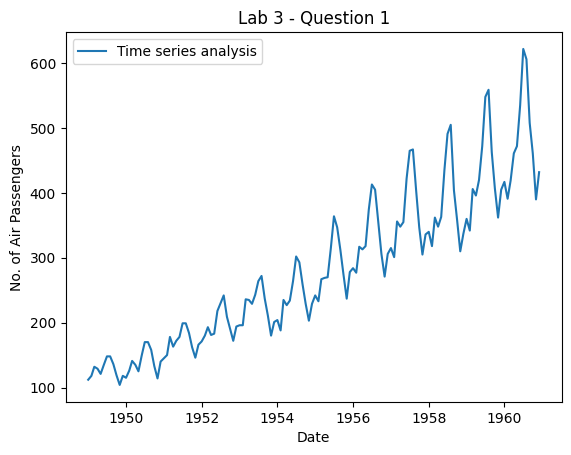

In [94]:
plt.plot(data['date'], data['value'], label = 'Time series analysis')
# plt.plot(x, y1, label='Line 1')
# plt.plot(x, y2, label='Line 2')
plt.xlabel('Date')
plt.ylabel('No. of Air Passengers')
plt.title('Lab 3 - Question 1')
plt.legend()
plt.show()

In [95]:
df['SMA'] = df['value'].rolling(window=12).mean()
df['MSTD'] = df['value'].rolling(window=12).std()
df.head()   


,value,SMA,MSTD
date,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

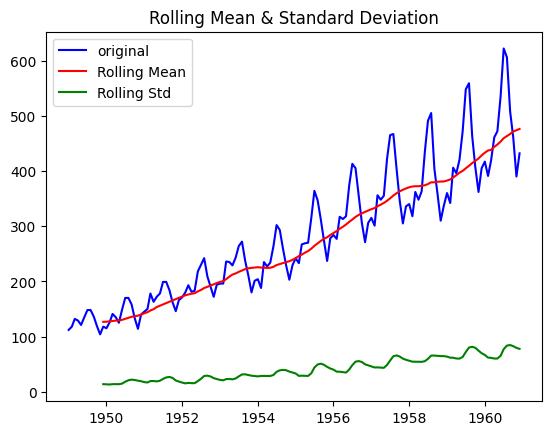

In [96]:
plt.plot(df["value"], color = 'blue', label='original')
plt.plot(df['SMA'], color = 'red', label='Rolling Mean')
plt.plot(df['MSTD'], color = 'green', label='Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')

In [97]:
from statsmodels.tsa.stattools import adfuller

ADF Test 
Null hyopothesis: data is non stationary
Alternate hypothesis: data is stationary
if test static <  critical value and p-value <0.05 then reject null hypothesis



In [98]:
#Perform Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
airpass_test = adfuller(df['value'], autolag='AIC')
dfoutput = pd.Series(airpass_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in airpass_test[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


<Axes: xlabel='date'>

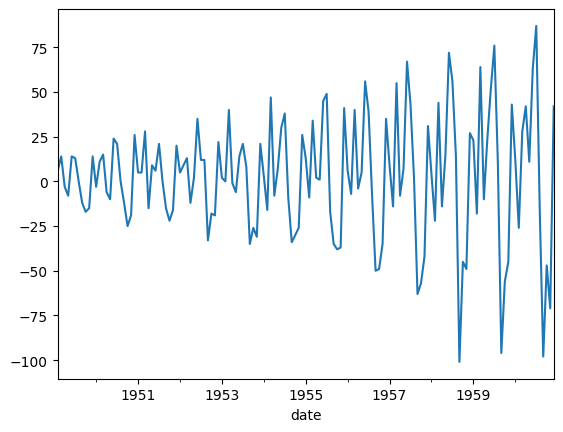

In [99]:
#single differencing
df["value_diff"] = df["value"] - df['value'].shift(1)
df['value_diff'].dropna().plot()

<Axes: xlabel='date'>

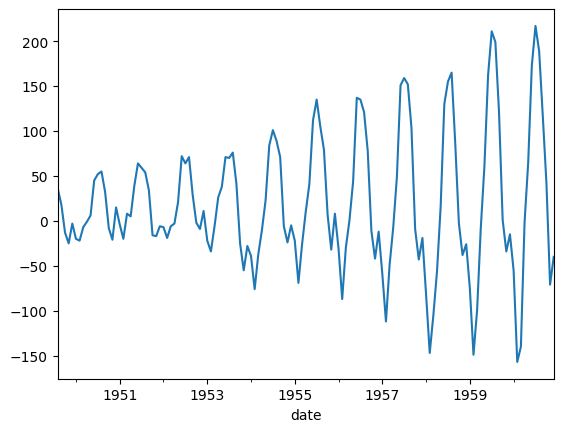

In [100]:
# seasonal differencing
n =7
df["value_sdiff"] = df["value"] - df['value'].shift(n)
df['value_sdiff'].dropna().plot()

In [101]:
# transformation
df['log_value'] = np.log(df['value'])
df.head()

,value,SMA,MSTD,value_diff,value_sdiff,log_value
date,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,4.718499
1949-02-01,118,NaN,NaN,6.0,NaN,4.770685
1949-03-01,132,NaN,NaN,14.0,NaN,4.882802
1949-04-01,129,NaN,NaN,-3.0,NaN,4.859812
1949-05-01,121,NaN,NaN,-8.0,NaN,4.795791


In [102]:
# Differencing logarithmic value
df["log_diff"] = df["log_value"] - df['log_value'].shift(1)
df.head()


,value,SMA,MSTD,value_diff,value_sdiff,log_value,log_diff
date,,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,4.718499,NaN
1949-02-01,118,NaN,NaN,6.0,NaN,4.770685,0.052186
1949-03-01,132,NaN,NaN,14.0,NaN,4.882802,0.112117
1949-04-01,129,NaN,NaN,-3.0,NaN,4.859812,-0.022990
1949-05-01,121,NaN,NaN,-8.0,NaN,4.795791,-0.064022


In [103]:
df['SMA_log'] = df['log_value'].rolling(window=12).mean()
df['MSTD_log'] = df['log_value'].rolling(window=12).std()
df.head(10)

,value,SMA,MSTD,value_diff,value_sdiff,log_value,log_diff,SMA_log,MSTD_log
date,,,,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,4.718499,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,6.0,NaN,4.770685,0.052186,NaN,NaN
1949-03-01,132,NaN,NaN,14.0,NaN,4.882802,0.112117,NaN,NaN
1949-04-01,129,NaN,NaN,-3.0,NaN,4.859812,-0.022990,NaN,NaN
1949-05-01,121,NaN,NaN,-8.0,NaN,4.795791,-0.064022,NaN,NaN
1949-06-01,135,NaN,NaN,14.0,NaN,4.905275,0.109484,NaN,NaN
1949-07-01,148,NaN,NaN,13.0,NaN,4.997212,0.091937,NaN,NaN
1949-08-01,148,NaN,NaN,0.0,36.0,4.997212,0.000000,NaN,NaN
1949-09-01,136,NaN,NaN,-12.0,18.0,4.912655,-0.084557,NaN,NaN


In [108]:
df.dropna(inplace=True)

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

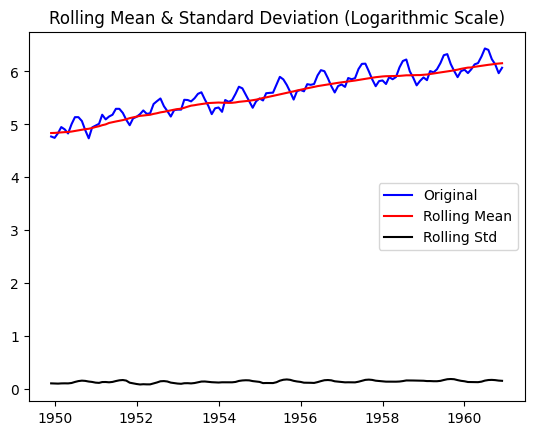

In [109]:
plt.plot(df['log_value'], color='blue', label='Original')
plt.plot(df['SMA_log'], color='red', label='Rolling Mean')
plt.plot(df['MSTD_log'], color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

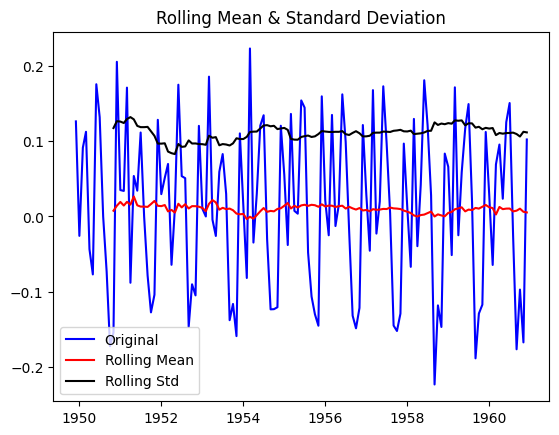

In [110]:
#Determine rolling statistics
movingAverage = df['log_diff'].rolling(window=12).mean()
movingSTD = df['log_diff'].rolling(window=12).std()
    
#Plot rolling statistics
plt.plot(df['log_diff'], color='blue', label='Original')
plt.plot(movingAverage, color='red', label='Rolling Mean')
plt.plot(movingSTD, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)
    
    

In [111]:
#Perform Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
airpass_test_log = adfuller(df['log_diff'], autolag='AIC')
dfoutput_log = pd.Series(airpass_test_log[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in airpass_test_log[4].items():
    dfoutput_log['Critical Value (%s)'%key] = value
print(dfoutput_log)

Results of Dickey Fuller Test:
Test Statistic                  -3.122207
p-value                          0.024953
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


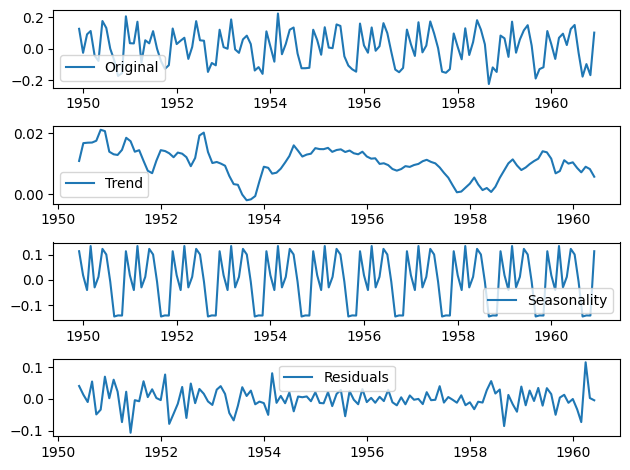

In [113]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['log_diff'])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df['log_diff'], label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [114]:
from statsmodels.tsa.stattools import acf, pacf

In [115]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

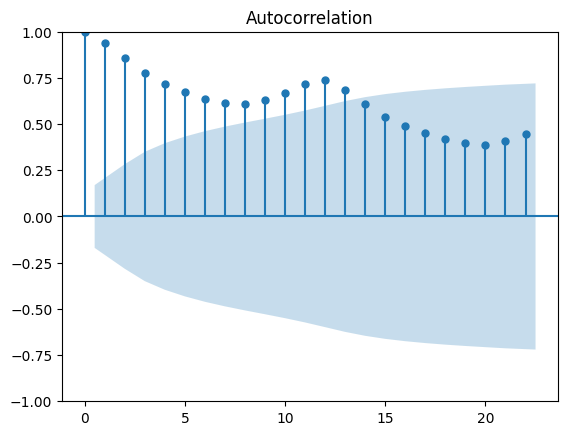

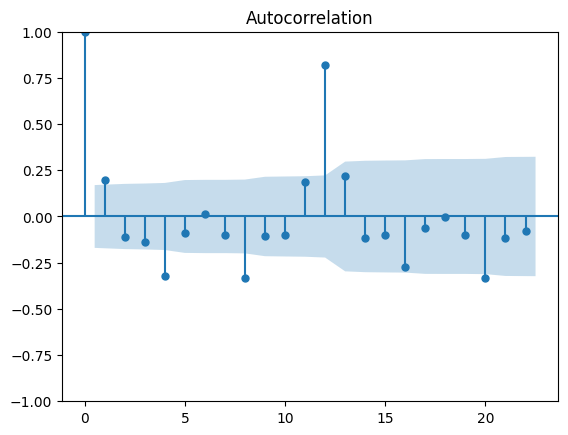

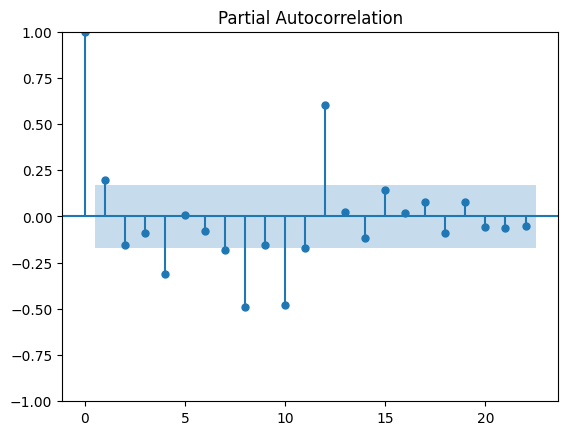

In [116]:
plot_acf(df['value'])
plt.show()


plot_acf(df['log_diff'])
plt.show()
plot_pacf(df['log_diff'])
plt.show()


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [133]:
from statsmodels.tsa.arima.model import ARIMA
ts_log = df['log_diff'].dropna()

AR MODEL (2,1,0)

Plotting AR model


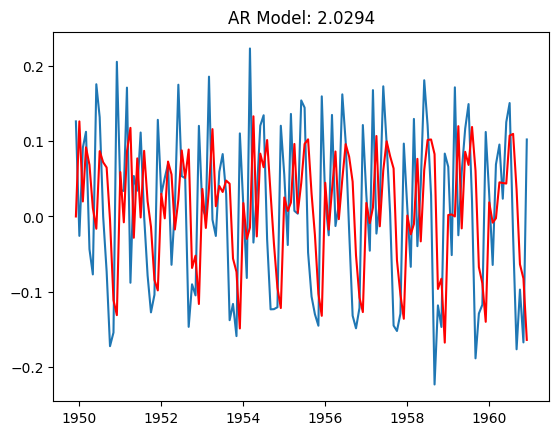

In [134]:
model1 = ARIMA(ts_log, order=(2,1,0))
results_AR1 = model1.fit()
plt.plot(ts_log)
plt.plot(results_AR1.fittedvalues, color='red')
plt.title('AR Model: %.4f'%sum((results_AR1.fittedvalues - ts_log)**2))
print('Plotting AR model')

MA MODEL (0,1,2)

Plotting MA model


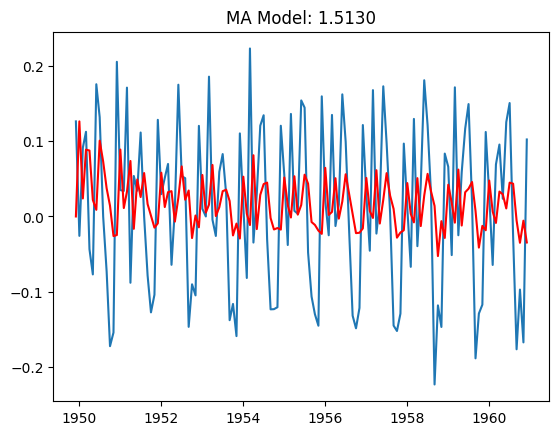

In [137]:
model2 = ARIMA(ts_log, order=(0,1,2))
results_AR2 = model2.fit()
plt.plot(ts_log)
plt.plot(results_AR2.fittedvalues, color='red')
plt.title('MA Model: %.4f'%sum((results_AR2.fittedvalues - ts_log)**2))
print('Plotting MA model')

ARIMA MODEL (2,1,2)

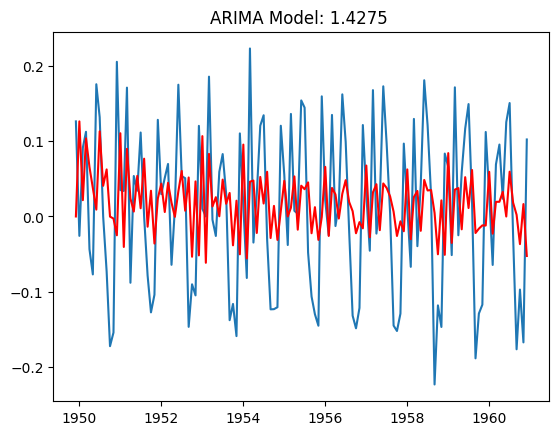

In [135]:
model3 = ARIMA(ts_log, order=(2,1,2))
result_AR3 = model3.fit()
plt.plot(ts_log)
plt.plot(result_AR3.fittedvalues, color='red')
plt.title('ARIMA Model: %.4f '%sum((result_AR3.fittedvalues - ts_log)**2))
plt.show()


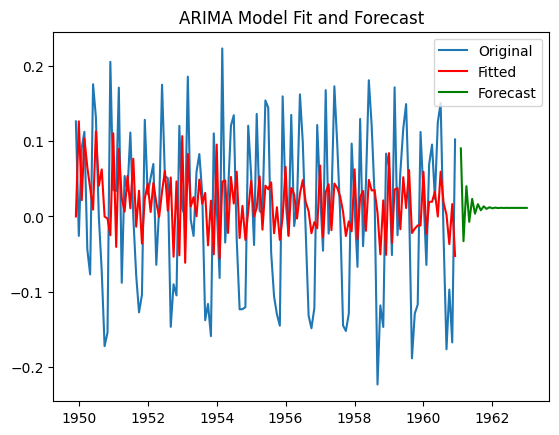

,predicted_mean
1961-01-01,0.090420
1961-02-01,-0.032819
1961-03-01,0.040221
1961-04-01,-0.007137
1961-05-01,0.023355
1961-06-01,0.003712
1961-07-01,0.016365
1961-08-01,0.008215
1961-09-01,0.013465
1961-10-01,0.010083


In [142]:
forecast_periods = 24
forecast = result_AR3.forecast(steps=forecast_periods)
# Assuming airpass_log_diff is your time series data
plt.plot(df['log_diff'], label='Original')
plt.plot(result_AR3.fittedvalues, color='red', label='Fitted')

# Plotting forecasted values
forecast_index = pd.date_range(start=df['log_value'].index[-1], periods=forecast_periods + 1, freq='M')[1:]
plt.plot(forecast_index, forecast, color='green', label='Forecast')

plt.title('ARIMA Model Fit and Forecast')
plt.legend()
plt.show()


pd.DataFrame(forecast)

In [143]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [144]:
# Fit a SARIMA model
sarima_model = SARIMAX(df['log_diff'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fit_sarima = sarima_model.fit()

In [145]:
# Forecast with the SARIMA model
forecast_steps = 24  # Assuming you want to forecast the next 24 months
sarima_forecast = fit_sarima.get_forecast(steps=forecast_steps)
sarima_forecast_values = sarima_forecast.predicted_mean
sarima_forecast_conf_int = sarima_forecast.conf_int()

In [146]:
# Table of SARIMA forecasted values
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='M')[1:]
sarima_forecast_table = pd.DataFrame({
    'Date': forecast_index,
    'SARIMA Forecasted Passengers (Thousands)': sarima_forecast_values
})
print(sarima_forecast_table)

                 Date  SARIMA Forecasted Passengers (Thousands)
1961-01-01 1961-01-31                                  0.036420
1961-02-01 1961-02-28                                 -0.058247
1961-03-01 1961-03-31                                  0.119414
1961-04-01 1961-04-30                                  0.023263
1961-05-01 1961-05-31                                  0.034161
1961-06-01 1961-06-30                                  0.134774
1961-07-01 1961-07-31                                  0.138131
1961-08-01 1961-08-31                                 -0.003555
1961-09-01 1961-09-30                                 -0.181645
1961-10-01 1961-10-31                                 -0.117429
1961-11-01 1961-11-30                                 -0.145355
1961-12-01 1961-12-31                                  0.102986
1962-01-01 1962-01-31                                  0.035098
1962-02-01 1962-02-28                                 -0.059252
1962-03-01 1962-03-31                   

In [148]:
comparison_table = pd.DataFrame({
    'Date': forecast_index,
    'ARIMA Forecast': forecast,
    'SARIMA Forecast': sarima_forecast_values
})
print(comparison_table)

                 Date  ARIMA Forecast  SARIMA Forecast
1961-01-01 1961-01-31        0.090420         0.036420
1961-02-01 1961-02-28       -0.032819        -0.058247
1961-03-01 1961-03-31        0.040221         0.119414
1961-04-01 1961-04-30       -0.007137         0.023263
1961-05-01 1961-05-31        0.023355         0.034161
1961-06-01 1961-06-30        0.003712         0.134774
1961-07-01 1961-07-31        0.016365         0.138131
1961-08-01 1961-08-31        0.008215        -0.003555
1961-09-01 1961-09-30        0.013465        -0.181645
1961-10-01 1961-10-31        0.010083        -0.117429
1961-11-01 1961-11-30        0.012262        -0.145355
1961-12-01 1961-12-31        0.010858         0.102986
1962-01-01 1962-01-31        0.011762         0.035098
1962-02-01 1962-02-28        0.011180        -0.059252
1962-03-01 1962-03-31        0.011555         0.114853
1962-04-01 1962-04-30        0.011313         0.028383
1962-05-01 1962-05-31        0.011469         0.032744
1962-06-01

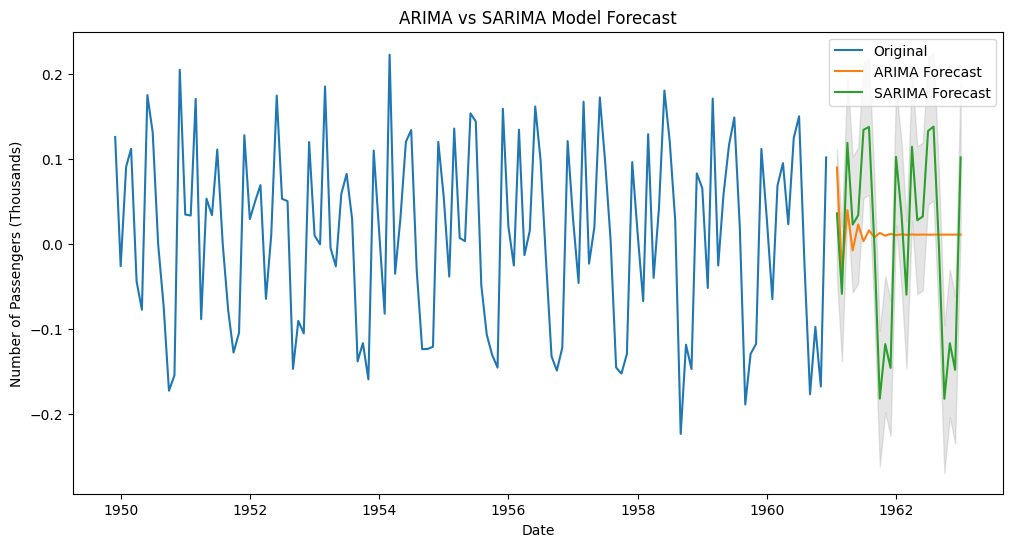

In [149]:
# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(df['log_diff'], label='Original')
plt.plot(forecast_index, forecast, label='ARIMA Forecast')
plt.plot(forecast_index, sarima_forecast_values, label='SARIMA Forecast')
plt.fill_between(forecast_index, sarima_forecast_conf_int.iloc[:, 0], sarima_forecast_conf_int.iloc[:, 1], color='gray', alpha=0.2)
plt.title('ARIMA vs SARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Passengers (Thousands)')
plt.legend()
plt.show()

In [150]:
# Calculate average and peak forecasted values
avg_forecasted_passengers = forecast.mean()
peak_forecasted_passengers = forecast.max()

print(f'Average Forecasted Passengers (Thousands): {avg_forecasted_passengers:.2f}')
print(f'Peak Forecasted Passengers (Thousands): {peak_forecasted_passengers:.2f}')



Average Forecasted Passengers (Thousands): 0.01
Peak Forecasted Passengers (Thousands): 0.09


Strategic Business Insights:
1. Fleet Management: The average forecasted passenger number indicates the need for maintaining or increasing the current fleet size to accommodate the expected passenger volume.
2. Optimize Ticket Pricing: Monitoring peak periods as indicated by peak forecasted values can help in dynamic pricing strategies to maximize revenue.
3. Marketing and Promotions: Plan targeted marketing campaigns during low demand periods to boost ticket sales and optimize resource allocation.
4. Resource Allocation: Ensuring adequate staffing and resources during peak periods to maintain service quality and customer satisfaction.
